# lab5 - 线性回归 【注意看原要求、有公式】

## Задание 1

Загрузите данные из файла reglab1.txt. Постройте по набору данных регрессии, используя модели с различными зависимыми переменными. Выберите наиболее подходящую модель.

从reglab1.txt下载数据。使用具有不同因变量的模型对数据集进行回归构建。选择最合适的模式

In [166]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from skimage.metrics import mean_squared_error


def split_data_and_get_score(data, data_index: list, target_index: str, estimator):
    # 构建函数名
    str_f = target_index + '(' + data_index[0]
    if len(data_index) != 1:
        for i in data_index[1:]:
            str_f += ', '
            str_f += i
    str_f += ')'

    x_train, x_test, y_train, y_test = train_test_split(data[data_index], data[target_index], train_size=0.25, random_state=90102)

    transfer = StandardScaler()
    x_train = transfer.fit_transform(x_train)
    x_test = transfer.transform(x_test)

    estimator.fit(X=x_train, y=y_train)
    y_pred = estimator.predict(X=x_test)
    mse_score = mean_squared_error(y_test, y_pred)
    score = estimator.score(X=x_test, y=y_test)
    print(str_f, '\t', mse_score, '\t', score)
    return [str_f, score, mse_score]

In [167]:
data = pd.read_csv('reglab1.txt', sep='\t')

df_res = []
funcs = (split_data_and_get_score(data, ['y'], 'x', LinearRegression()),
         split_data_and_get_score(data, ['z'], 'x', LinearRegression()),
         split_data_and_get_score(data, ['y', 'z'], 'x', LinearRegression()),
         split_data_and_get_score(data, ['x'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['z'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x', 'z'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x'], 'z', LinearRegression()),
         split_data_and_get_score(data, ['y'], 'z', LinearRegression()),
         split_data_and_get_score(data, ['x', 'y'], 'z', LinearRegression()))

for fun in funcs:
    df_res.append(fun)

pd.DataFrame(data=df_res, columns=['Function', 'Accuracy score', 'MSE']).to_csv('./result/zadanie_1.csv')

x(y) 	 0.06926406818282412 	 -0.030668326236679366
x(z) 	 0.04511787530161212 	 0.32863364453664756
x(y, z) 	 0.006012586253326931 	 0.9105310679454597
y(x) 	 0.09105236117441644 	 -0.055185152872371024
y(z) 	 0.035814680034968696 	 0.5849517998178844
y(x, z) 	 0.005141425776043864 	 0.9404171833272443
z(x) 	 2.2012823706222093 	 0.3244315168489753
z(y) 	 1.3901109630937207 	 0.5733781511713161
z(x, y) 	 0.12392318239442579 	 0.961968261103283


## Задание 2

Реализуйте следующий алгоритм для уменьшения количества признаков, используемых для построения регрессии: для каждого   выбрать подмножество признаков мощности  , минимизирующее остаточную сумму квадратов RSS. Используя полученный алгоритм, выберите оптимальное подмножество признаков для данных из файла reglab.txt. Объясните свой выбор

实施以下算法，以减少用于构建回归的特征数量：对于每个选择权力特征的子集，最小化残差平方之和RSS。使用产生的算法，为reglab.txt文件中的数据选择最佳特征子集。解释你的选择

In [168]:
data = pd.read_csv('reglab.txt', sep='\t')
df_res = []
funcs = (split_data_and_get_score(data, ['x1'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x2'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x3'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x4'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x1', 'x2'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x1', 'x3'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x1', 'x4'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x2', 'x3'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x2', 'x4'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x3', 'x4'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x1', 'x2', 'x3'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x2', 'x3', 'x4'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x1', 'x3', 'x4'], 'y', LinearRegression()),
         split_data_and_get_score(data, ['x1', 'x2', 'x3', 'x4'], 'y', LinearRegression())
         )

for fun in funcs:
    df_res.append(fun)

df_res = pd.DataFrame(data=df_res, columns=['Function', 'Accuracy score', 'MSE'])
print(df_res.sort_values(by='MSE'))
df_res.to_csv('./result/zadanie_2.csv')

y(x1) 	 0.854387429340489 	 0.5727938806656779
y(x2) 	 1.502171129955459 	 0.24889262532843104
y(x3) 	 2.3638687320715377 	 -0.1819686865284844
y(x4) 	 2.2503551209099806 	 -0.12521023286843125
y(x1, x2) 	 0.0029661736791759367 	 0.9985168700951856
y(x1, x3) 	 0.9109395317373719 	 0.5445170083996399
y(x1, x4) 	 0.8596752730799266 	 0.5701498820229132
y(x2, x3) 	 1.5093854563439173 	 0.24528535739097612
y(x2, x4) 	 1.5002658585007504 	 0.2498452887180045
y(x3, x4) 	 2.363557065497583 	 -0.18181284871648828
y(x1, x2, x3) 	 0.0016919607856931004 	 0.9991539950419451
y(x2, x3, x4) 	 1.5109240950357579 	 0.24451601570589743
y(x1, x3, x4) 	 0.9122475734215997 	 0.5438629685663551
y(x1, x2, x3, x4) 	 0.0010744250500932208 	 0.9994627718756113
             Function  Accuracy score       MSE
13  y(x1, x2, x3, x4)        0.999463  0.001074
10      y(x1, x2, x3)        0.999154  0.001692
4           y(x1, x2)        0.998517  0.002966
0               y(x1)        0.572794  0.854387
6           y(

## Задание 3

Загрузите данные из файла cygage.txt. Постройте регрессию, выражающую зависимость возраста исследуемых отложений от глубины залегания, используя веса наблюдений. Оцените качество построенной модели.

从文件cygage.txt中加载数据。用观测值的权重构建回归，表达所研究的沉积物的年龄对发生深度的依赖性。评估模型的质量。

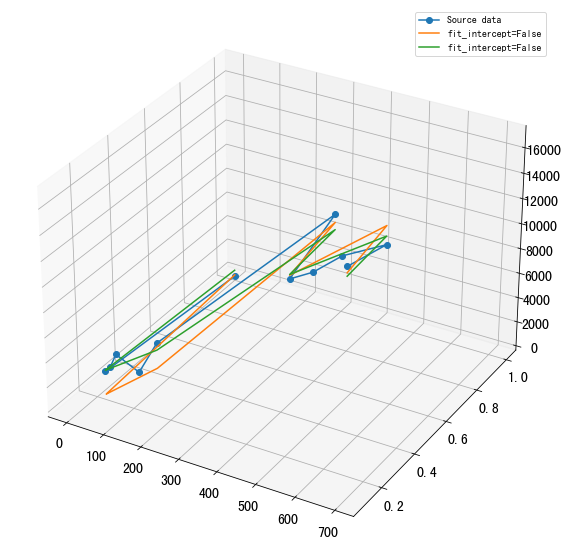

In [114]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data = pd.read_csv('cygage.txt', sep='\t')

estimator = LinearRegression(fit_intercept=False)
estimator.fit(X=data.iloc[:, 1:], y=data['calAge'])
data_intercept_on = data[:]
data_intercept_on['calAge'] = estimator.predict(X=data.iloc[:, 1:])

estimator = LinearRegression(fit_intercept=True)
estimator.fit(X=data.iloc[:, 1:], y=data['calAge'])
data_intercept_off = data[:]
data_intercept_off['calAge'] = estimator.predict(X=data.iloc[:, 1:])

plt.figure(figsize=(10, 10))
ax = plt.axes(projection='3d')
ax.plot3D(data['Depth'], data['Weight'], data['calAge'], marker='o', label='Source data')
ax.plot3D(data_intercept_on['Depth'], data_intercept_on['Weight'], data_intercept_on['calAge'], label='fit_intercept=False')
ax.plot3D(data_intercept_off['Depth'], data_intercept_off['Weight'], data_intercept_off['calAge'], label='fit_intercept=False')
plt.legend()
plt.tick_params(labelsize=14)
plt.show()

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
LinearRegression(fit_intercept=False)
Score:  0.9126621626790937 	MSE:  1880320.9993073966
coef:  [24.34830664] 	intercept:  0.0
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
LinearRegression(fit_intercept=True)
Score:  0.9592555361125507 	MSE:  877199.0857936436
coef:  [20.67458772] 	intercept:  1693.0714284790329


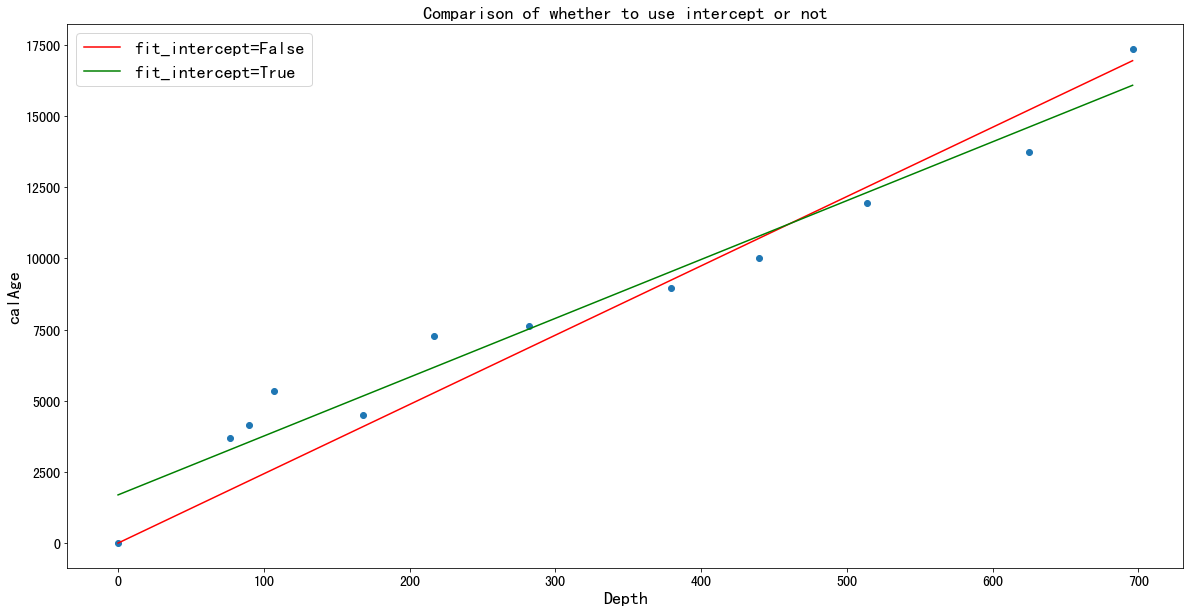

In [157]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


data = pd.read_csv('cygage.txt', sep='\t')
data_x = data['Depth'].values.reshape(-1, 1)
data_y = data['calAge'].values

print('>>' * 50)
print('LinearRegression(fit_intercept=False)')
estimator = LinearRegression(fit_intercept=False)
estimator.fit(X=data_x, y=data_y)
score = estimator.score(X=data_x, y=data_y)
y_pred_inter_off = estimator.predict(X=data_x)
mse_score = mean_squared_error(data_y, y_pred_inter_off)
print('Score: ', score, '\tMSE: ', mse_score)
print('coef: ', estimator.coef_, '\tintercept: ', estimator.intercept_)

print('>>' * 50)
print('LinearRegression(fit_intercept=True)')
estimator = LinearRegression(fit_intercept=True)
estimator.fit(X=data_x, y=data_y)
score = estimator.score(X=data_x, y=data_y)
y_pred_inter_on = estimator.predict(X=data_x)
mse_score = mean_squared_error(data_y, y_pred_inter_on)
print('Score: ', score, '\tMSE: ', mse_score)
print('coef: ', estimator.coef_, '\tintercept: ', estimator.intercept_)

plt.figure(figsize=(20, 10))
plt.scatter(x=data_x, y=data_y)
plt.plot(data_x, y_pred_inter_off, color='r',label='fit_intercept=False')
plt.plot(data_x, y_pred_inter_on, color='g',label='fit_intercept=True')
plt.legend(fontsize=18)
plt.title('Comparison of whether to use intercept or not', size=18)
plt.xlabel('Depth', size=18)
plt.ylabel('calAge', size=18)
plt.tick_params(labelsize=14)
plt.show()

## Задание 4

Загрузите данные из файла longley.csv. Данные состоят из 7 экономических переменных, наблюдаемых с 1947 по 1962 годы (n=16). Исключите переменную Population. Разделите данные на тестовую и обучающую выборки равных размеров случайным образом. Постройте линейную регрессию по признаку Employed.

Постройте гребневую регрессию для значений  . Подсчитайте ошибку на тестовой и обучающей выборке для линейной регрессии и гребневой регрессии на данных значениях λ, постройте графики. Объясните полученные результаты.

从longley.csv文件中下载数据。数据包括从1947年到1962年观察到的7个经济变量（n=16）。排除变量 "人口"。将数据随机分成大小相同的测试样本和训练样本。构建一个关于Employed特征的线性回归。

对......的值绘制岭回归图。计算在给定的λ值下，线性回归和岭回归的测试样本和训练样本的误差，并绘制图表。解释获得的结果

>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
LinearRegression()
Score on train:  0.989016957621729 	Score on test:  0.989016957621729 	MSE on train:  0.020680957338426634 	MSE on test:  0.159539560324139
>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>
Ridge()
Score on train:  0.997488687833341 	Score on test:  0.9890588397667195 	MSE on train:  0.020685013917744934 	MSE on test:  0.15893118071791829
Score on train:  0.9974879513280756 	Score on test:  0.9890824063382818 	MSE on train:  0.020691080316765337 	MSE on test:  0.15858885294243424
Score on train:  0.9974861250399418 	Score on test:  0.989118385599347 	MSE on train:  0.020706122968955354 	MSE on test:  0.15806621856723796
Score on train:  0.9974816299773419 	Score on test:  0.9891720650557452 	MSE on train:  0.020743147610365276 	MSE on test:  0.15728647133716595
Score on train:  0.9974706938234523 	Score on test:  0.98

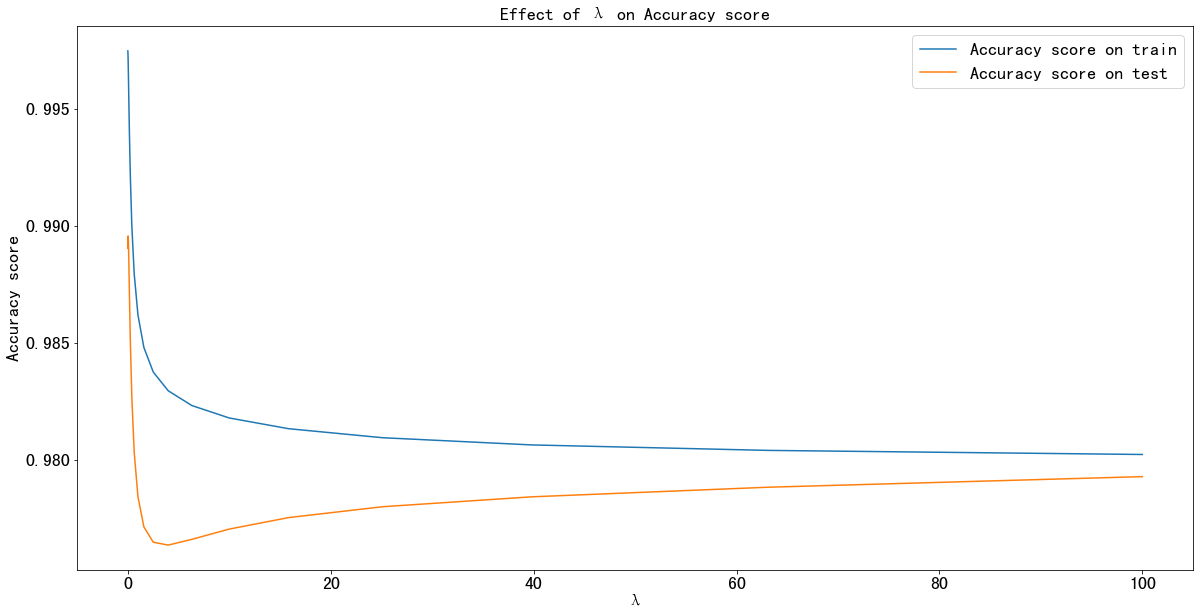

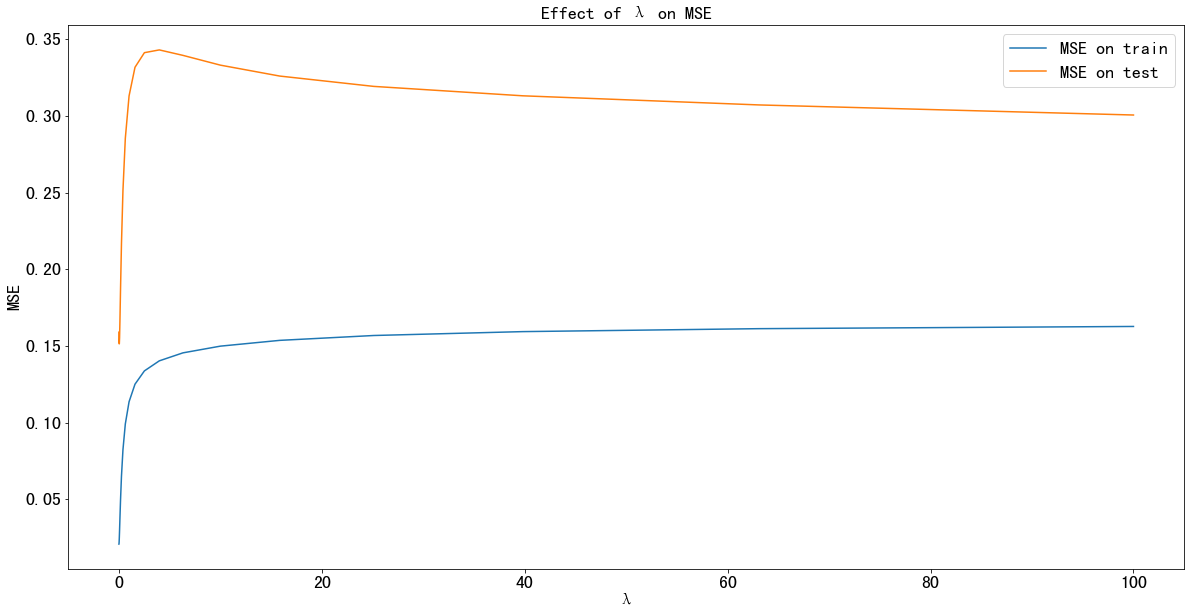

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score


data = pd.read_csv('longley.csv')
data.drop(columns='Population', inplace=True)

x_train, x_test, y_train, y_test = train_test_split(data.iloc[:, :-1], data['Employed'], test_size=0.5, random_state=90102)

# transfer = StandardScaler() 用标准化反而误差变大
# x_train = transfer.fit_transform(X=x_train)
# x_test = transfer.transform(X=x_test)

print('>>' * 50)
print('LinearRegression()')
estimator = LinearRegression()
estimator.fit(X=x_train, y=y_train)
score_train = estimator.score(X=x_test, y=y_test)
score_test = estimator.score(X=x_test, y=y_test)
y_pred = estimator.predict(X=x_train)
mse_train = mean_squared_error(y_train, y_pred)
y_pred = estimator.predict(X=x_test)
mse_test = mean_squared_error(y_test, y_pred)
print('Score on train: ', score_train, '\tScore on test: ', score_test, '\tMSE on train: ', mse_train, '\tMSE on test: ', mse_test)

print('>>' * 50)
print('Ridge()')
arr_alpha = [10 ** (-3 + 0.2 * i) for i in range(26)]
arr_score_ridge = []
arr_mse_ridge = []
for alpha in arr_alpha:
    estimator = Ridge(alpha=alpha)
    estimator.fit(X=x_train, y=y_train)
    score_train = estimator.score(X=x_train, y=y_train)
    score_test = estimator.score(X=x_test, y=y_test)
    arr_score_ridge.append([score_train, score_test])

    y_pred = estimator.predict(X=x_train)
    mse_train = mean_squared_error(y_train, y_pred)
    y_pred = estimator.predict(X=x_test)
    mse_test = mean_squared_error(y_test, y_pred)
    arr_mse_ridge.append([mse_train, mse_test])

    print('Score on train: ', score_train, '\tScore on test: ', score_test, '\tMSE on train: ', mse_train, '\tMSE on test: ', mse_test)

arr_score_ridge = pd.DataFrame(arr_score_ridge)
arr_mse_ridge = pd.DataFrame(arr_mse_ridge)
plt.figure(figsize=(20, 10))
plt.plot(arr_alpha, arr_score_ridge.iloc[:, 0], label='Accuracy score on train')
plt.plot(arr_alpha, arr_score_ridge.iloc[:, 1], label='Accuracy score on test')
plt.legend(fontsize=18)
plt.title('Effect of λ on Accuracy score', size=18)
plt.xlabel('λ', size=18)
plt.ylabel('Accuracy score', size=18)
plt.tick_params(labelsize= 18)
plt.show()

plt.figure(figsize=(20, 10))
plt.plot(arr_alpha, arr_mse_ridge.iloc[:, 0], label='MSE on train')
plt.plot(arr_alpha, arr_mse_ridge.iloc[:, 1], label='MSE on test')
plt.legend(fontsize=18)
plt.title('Effect of λ on MSE', size=18)
plt.xlabel('λ', size=18)
plt.ylabel('MSE', size=18)
plt.tick_params(labelsize=18)
plt.show()

## Задание 5

Загрузите данные из файла eustock.csv. Данные содержат ежедневные котировки на момент закрытия фондовых бирж: Germany DAX (Ibis), Switzerland SMI, France CAC, и UK FTSE. Постройте на одном графике все кривые изменения котировок во времени. Постройте линейную регрессию для каждой модели в отдельности и для всех моделей вместе. Оцените, какая из бирж имеет наибольшую динамику.

从eustock.csv文件中加载数据。这些数据包含证券交易所收盘时的每日报价。德国DAX指数（Ibis）、瑞士SMI指数、法国CAC指数和英国富时指数。在一张图上画出所有报价随时间变化的曲线。为每个模型单独绘制线性回归图，并为所有模型一起绘制线性回归图。估计哪个证券交易所的势头最猛

Coef  DAX :  [1.72943226]
Coef  SMI :  [2.75975579]
Coef  CAC :  [0.78682966]
Coef  FTSE :  [1.67483145]


<AxesSubplot:>

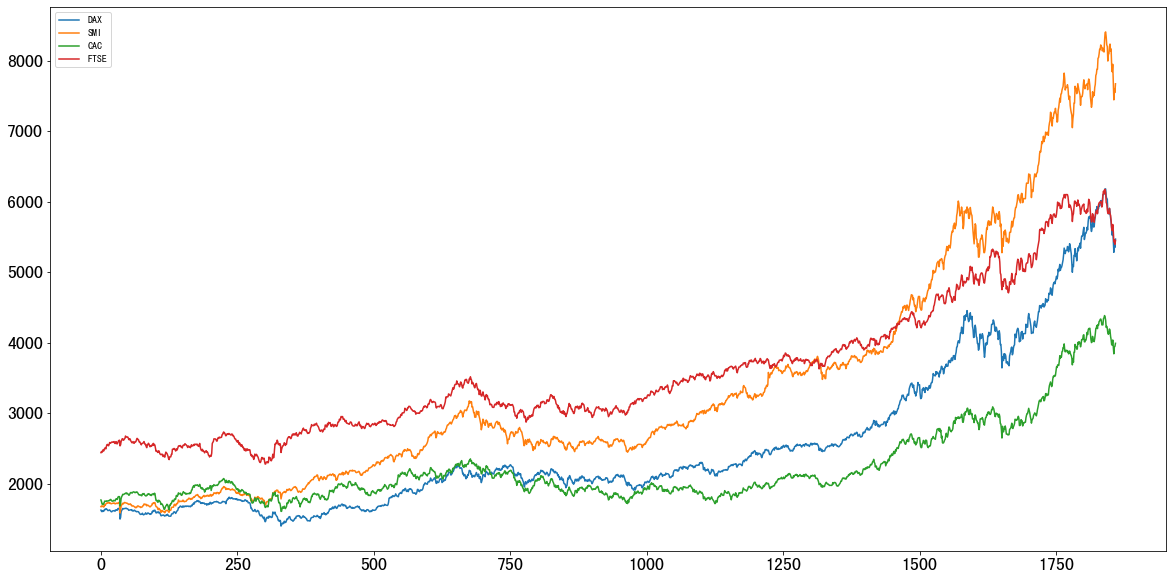

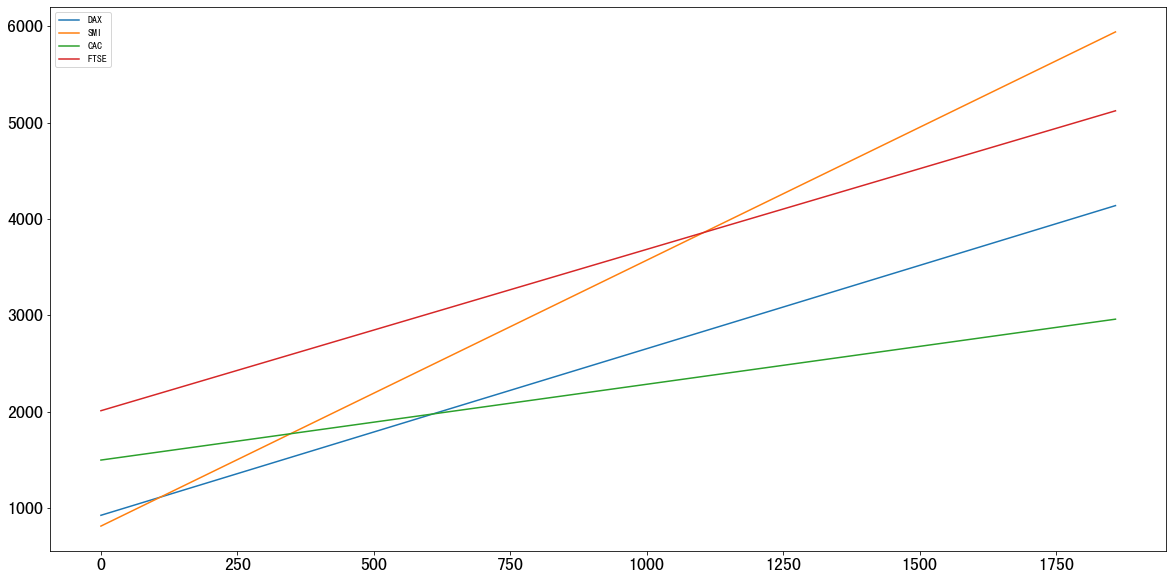

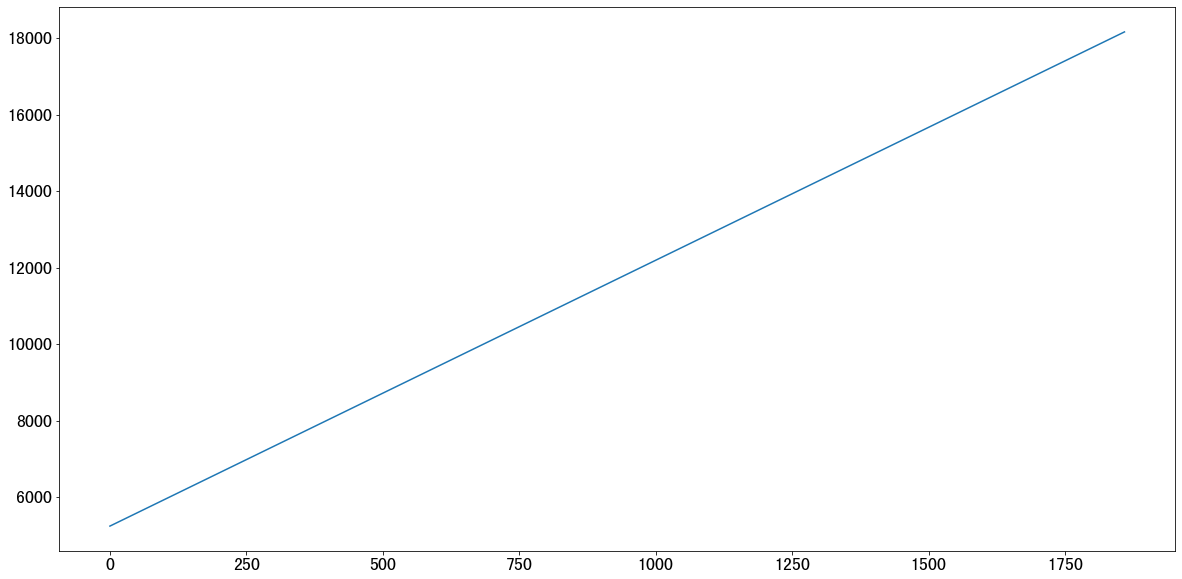

In [270]:
import pandas as pd
from sklearn.linear_model import LinearRegression


data = pd.read_csv('eustock.csv')
df_pred = data.copy()
data.plot(figsize=(20, 10), fontsize=18)

arr_x = np.arange(start=0, stop=1860, step=1).reshape(-1, 1)
for type_com in data.columns:
    estimator = LinearRegression()
    estimator.fit(X=arr_x, y=data[type_com])
    df_pred[type_com] = estimator.predict(X=arr_x)
    print('Coef ', type_com, ': ', estimator.coef_)
    pass
df_pred.plot(figsize=(20, 10), fontsize=18)

estimator = LinearRegression()
estimator.fit(X=arr_x, y=data.sum(axis=1))
df_total = pd.Series(estimator.predict(X=arr_x), name='Total')
df_pred = pd.concat([df_pred, df_total], axis=1)
plt.figure()
df_pred['Total'].plot(figsize=(20, 10), fontsize=18)

In [265]:
df_pred

,DAX,SMI,CAC,FTSE,Total
0,923.149593,811.030699,1496.470329,2008.887338,5239.537958
1,924.879025,813.790455,1497.257159,2010.562169,5246.488808
2,926.608457,816.550211,1498.043988,2012.237001,5253.439657
3,928.337889,819.309966,1498.830818,2013.911832,5260.390506
4,930.067322,822.069722,1499.617648,2015.586664,5267.341355
...,...,...,...,...,...
1855,4131.246442,5930.377697,2956.039342,5115.699681,18133.363161
1856,4132.975874,5933.137453,2956.826171,5117.374512,18140.314010
1857,4134.705306,5935.897209,2957.613001,5119.049343,18147.264859
1858,4136.434739,5938.656964,2958.399831,5120.724175,18154.215709


## Задание 6

Загрузите данные из файла JohnsonJohnson.csv. Данные содержат поквартальную прибыль компании Johnson & Johnson с 1960 по 1980 гг. Постройте на одном графике все кривые изменения прибыли во времени. Постройте линейную регрессию для каждого квартала в отдельности и для всех кварталов вместе. Оцените, в каком квартале компания имеет наибольшую и наименьшую динамику доходности. Сделайте прогноз по прибыли в 2016 году во всех кварталах и в среднем по году.

从JohnsonJohnson.csv文件中下载数据。这些数据包含了强生公司从1960年到1980年的季度利润。在一张图上画出所有随时间变化的利润曲线。为每个季度单独绘制线性回归图，为所有季度绘制线性回归图。估计公司在哪个季度有最高和最低的利润率趋势。对2016年所有季度的利润和全年的平均利润做出预测

In [240]:
data.values

array([[1628.75, 1678.1 , 1772.8 , 2443.6 ],
       [1613.63, 1688.5 , 1750.5 , 2460.2 ],
       [1606.51, 1678.6 , 1718.  , 2448.2 ],
       ...,
       [5386.94, 7607.5 , 3945.7 , 5462.2 ],
       [5355.03, 7552.6 , 3951.7 , 5399.5 ],
       [5473.72, 7676.3 , 3995.  , 5455.  ]])

## Задание 7

Загрузите данные из файла cars.csv. Данные содержат зависимости тормозного пути автомобиля (футы) от его скорости (мили в час). Данные получены в 1920 г. Постройте регрессионную модель и оцените длину тормозного пути при скорости 40 миль в час. 

从cars.csv文件中加载数据。这些数据包含了汽车的制动距离（英尺）和它的速度（每小时英里）之间的关系。这些数据是在1920年收集的。构建一个回归模型，估计40英里/小时时的制动距离长度。

## Задание 8

Загрузите данные из файла svmdata6.txt. Постройте регрессионный алгоритм метода опорных векторов (sklearn.svm.SVR) с параметром C = 1, используя ядро "rbf". Отобразите на графике зависимость среднеквадратичной ошибки на обучающей выборке от значения параметра ε. Прокомментируйте полученный результат

从文件svmdata6.txt中加载数据。构建一个支持向量法（sklearn.svm.SVR）的回归算法，参数C=1，使用核 "rbf"。绘制训练集的有效值误差与ε值的关系图。对结果的评论

## Задание 9

Загрузите набор данных из файла nsw74psid1.csv. Постройте регрессионное дерево (sklearn.tree.DecisionTreeRegressor) для признака re78. Постройте линейную регрессионную модель и SVM-регрессию для этого набора данных. Сравните качество построенных моделей, выберите оптимальную модель и объясните свой выбор. 

从文件nsw74psid1.csv中下载数据集。为特征re78构建一个回归树（sklearn.tree.DecisionTreeRegressor）。为这个数据集构建一个线性回归模型和SVM回归。比较所建模型的质量，选择最佳模型并解释你的选择